In [34]:
import tensorflow as tf
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import random
import pandas as pd

# Create Dataset

In [2]:
data_dir=r"C:\Users\speed\Documents\Indian Monuments Prediction TensorFlow CNN\data\train"
classes=[i for i in os.listdir(data_dir)]
train=[]
for i in classes:
    current_class=classes.index(i)
    current_path=os.path.join(data_dir,i)
    for j in os.listdir(current_path):
        img=cv2.imread(os.path.join(data_dir,i,j),cv2.IMREAD_GRAYSCALE)
        try:
            img=cv2.resize(img,(70,70))
        except:
            continue
        train.append([img,current_class])
random.shuffle(train)
x=[]
y=[]
for i,j in train:
    x.append(i)
    y.append(j)
x=np.array(x)
y=np.array(y)

# Initialize TensorBoard

In [3]:
tsb=tf.keras.callbacks.TensorBoard(log_dir="logs")

# Create Model

In [4]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation="relu",input_shape=(70,70,1)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(len(classes),activation="softmax")
])

# Compile The Model

In [5]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

# Train The Model

In [6]:
history=model.fit(x,y,epochs=100,validation_split=0.1,callbacks=[tsb])

Epoch 1/100
106/106 [==============================] - 21s 192ms/step - loss: 3.9376 - accuracy: 0.0813 - val_loss: 2.9241 - val_accuracy: 0.1707
Epoch 2/100
106/106 [==============================] - 20s 186ms/step - loss: 2.8008 - accuracy: 0.1842 - val_loss: 2.4578 - val_accuracy: 0.3040
Epoch 3/100
106/106 [==============================] - 21s 196ms/step - loss: 2.4415 - accuracy: 0.2854 - val_loss: 2.3634 - val_accuracy: 0.3333
Epoch 4/100
106/106 [==============================] - 37s 354ms/step - loss: 2.1741 - accuracy: 0.3622 - val_loss: 2.1977 - val_accuracy: 0.3680
Epoch 5/100
106/106 [==============================] - 18s 165ms/step - loss: 1.8667 - accuracy: 0.4506 - val_loss: 2.0293 - val_accuracy: 0.4480
Epoch 6/100
106/106 [==============================] - 17s 163ms/step - loss: 1.5907 - accuracy: 0.5271 - val_loss: 2.0005 - val_accuracy: 0.4800
Epoch 7/100
106/106 [==============================] - 18s 172ms/step - loss: 1.3085 - accuracy: 0.6072 - val_loss: 2.0958 -

Epoch 57/100
106/106 [==============================] - 21s 194ms/step - loss: 0.1446 - accuracy: 0.9585 - val_loss: 3.4379 - val_accuracy: 0.5893
Epoch 58/100
106/106 [==============================] - 22s 208ms/step - loss: 0.1308 - accuracy: 0.9647 - val_loss: 3.9544 - val_accuracy: 0.5760
Epoch 59/100
106/106 [==============================] - 20s 188ms/step - loss: 0.1147 - accuracy: 0.9683 - val_loss: 3.7737 - val_accuracy: 0.5893
Epoch 60/100
106/106 [==============================] - 21s 196ms/step - loss: 0.1209 - accuracy: 0.9668 - val_loss: 3.6460 - val_accuracy: 0.6053
Epoch 61/100
106/106 [==============================] - 21s 199ms/step - loss: 0.1011 - accuracy: 0.9739 - val_loss: 3.7592 - val_accuracy: 0.5840
Epoch 62/100
106/106 [==============================] - 21s 199ms/step - loss: 0.0852 - accuracy: 0.9763 - val_loss: 4.0050 - val_accuracy: 0.6107
Epoch 63/100
106/106 [==============================] - 19s 178ms/step - loss: 0.0973 - accuracy: 0.9754 - val_loss: 3

# Accuracy Graph

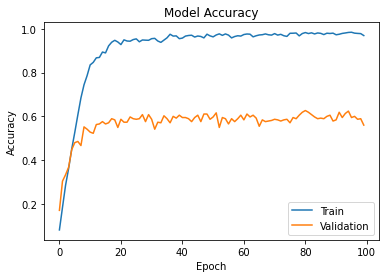

In [7]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train","Validation"],loc="best")

# Loss Graph

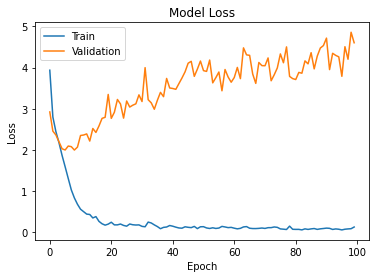

In [8]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train","Validation"],loc="best")

# Create Test Dataset

In [18]:
data_dir=r"C:\Users\speed\Documents\Indian Monuments Prediction TensorFlow CNN\data\test"
classes=[i for i in os.listdir(data_dir)]
test=[]
for i in classes:
    current_class=classes.index(i)
    current_path=os.path.join(data_dir,i)
    for j in os.listdir(current_path):
        img=cv2.imread(os.path.join(data_dir,i,j),cv2.IMREAD_GRAYSCALE)
        try:
            img=cv2.resize(img,(70,70))
        except:
            continue
        test.append([img,current_class])
random.shuffle(test)
X=[]
Y=[]
for i,j in test:
    X.append(i)
    Y.append(j)
X=np.array(X)
Y=np.array(Y)

# Predict On Test Dataset

In [79]:
predicted=[]
for i,j in enumerate(model.predict([X])):
    predicted.append({"Image Number":i,"Predicted":classes[np.argmax(j)]})

34/34 [==============================] - 2s 46ms/step


# Create Dataframe Object To Compare Predicted And Actual Image In Test Dataset

In [96]:
verify=pd.DataFrame(predicted)
verify["Actual"]=[classes[i] for i in Y]

# Compare Predicted And Actual Class Name

In [116]:
verify.head(20) # First 20

,Image Number,Predicted,Actual
0,0,Khajuraho,Khajuraho
1,1,qutub_minar,qutub_minar
2,2,Ajanta Caves,Ajanta Caves
3,3,tanjavur temple,Hawa mahal
4,4,jamali_kamali_tomb,jamali_kamali_tomb
5,5,iron_pillar,Sun Temple Konark
6,6,Chhota_Imambara,golden temple
7,7,qutub_minar,qutub_minar
8,8,alai_darwaza,alai_darwaza
9,9,Gateway of India,Humayun_s Tomb


# Predict On Images 

In [14]:
def prepare(filepath):
    img=cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    img=cv2.resize(img,(70,70))
    return img.reshape(-1,70,70,1)

1/1 [==============================] - 0s 15ms/step
iron_pillar


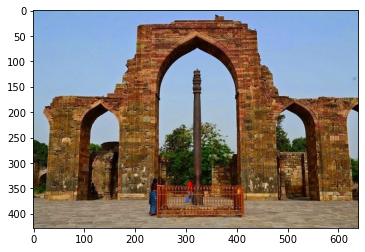

In [101]:
print(classes[np.argmax(model.predict(prepare(r"C:\Users\speed\Documents\Indian Monuments Prediction TensorFlow CNN\data\test\iron_pillar\img3.jpg")))])
plt.imshow(plt.imread(r"C:\Users\speed\Documents\Indian Monuments Prediction TensorFlow CNN\data\test\iron_pillar\img3.jpg"))

1/1 [==============================] - 0s 17ms/step
Hawa mahal


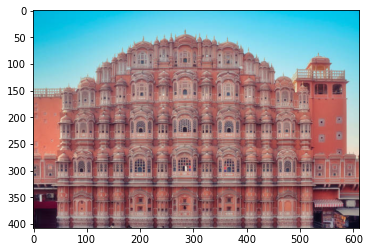

In [102]:
print(classes[np.argmax(model.predict(prepare(r"C:\Users\speed\Documents\Indian Monuments Prediction TensorFlow CNN\data\test\Hawa mahal\m (84).jpg")))])
plt.imshow(plt.imread(r"C:\Users\speed\Documents\Indian Monuments Prediction TensorFlow CNN\data\test\Hawa mahal\m (84).jpg"))

1/1 [==============================] - 0s 15ms/step
qutub_minar


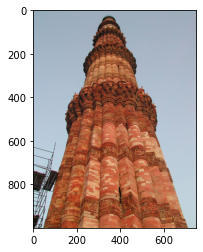

In [103]:
print(classes[np.argmax(model.predict(prepare(r"C:\Users\speed\Documents\Indian Monuments Prediction TensorFlow CNN\data\test\qutub_minar\img4.jpg")))])
plt.imshow(plt.imread(r"C:\Users\speed\Documents\Indian Monuments Prediction TensorFlow CNN\data\test\qutub_minar\img4.jpg"))

1/1 [==============================] - 0s 15ms/step
alai_minar


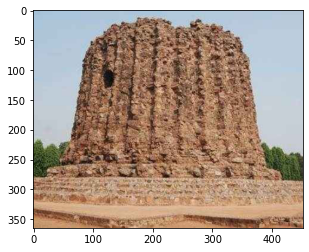

In [104]:
print(classes[np.argmax(model.predict(prepare(r"C:\Users\speed\Documents\Indian Monuments Prediction TensorFlow CNN\data\test\alai_minar\img394.jpg")))])
plt.imshow(plt.imread(r"C:\Users\speed\Documents\Indian Monuments Prediction TensorFlow CNN\data\test\alai_minar\img394.jpg"))

# Save The Model

In [105]:
model.save("indian_monuments_prediction.h5")

# Convert Model To TFLite Model For Edge Devices

In [106]:
tf_lite_converter=tf.lite.TFLiteConverter.from_keras_model(model)
with open("indian_monuments_prediction.tflite","wb")as f:
    f.write(tf_lite_converter.convert())

INFO:tensorflow:Assets written to: C:\Users\speed\AppData\Local\Temp\tmpqxsisfwq\assets


INFO:tensorflow:Assets written to: C:\Users\speed\AppData\Local\Temp\tmpqxsisfwq\assets
